## Assignment No.: (1)
### Canonical Maxwell-Boltzmann partition function of a 2-level system :


In [1]:
import numpy as np
import matplotlib.pyplot as plt

kB = 1.38e-23
e = 1.6e-19

C:\Users\Stark\AppData\Local\Temp\ipykernel_11452\3576997897.py:30: RuntimeWarning: divide by zero encountered in log
  U[:, i] = kB * T1**2 * np.diff(np.log(Z_Tn[:, i])) / dT
C:\Users\Stark\Anaconda22\lib\site-packages\numpy\lib\function_base.py:1292: RuntimeWarning: invalid value encountered in subtract
  a = op(a[slice1], a[slice2])
C:\Users\Stark\AppData\Local\Temp\ipykernel_11452\3576997897.py:32: RuntimeWarning: divide by zero encountered in log
  F[:, i] = -kB * T * np.log(Z_Tn[:, i])


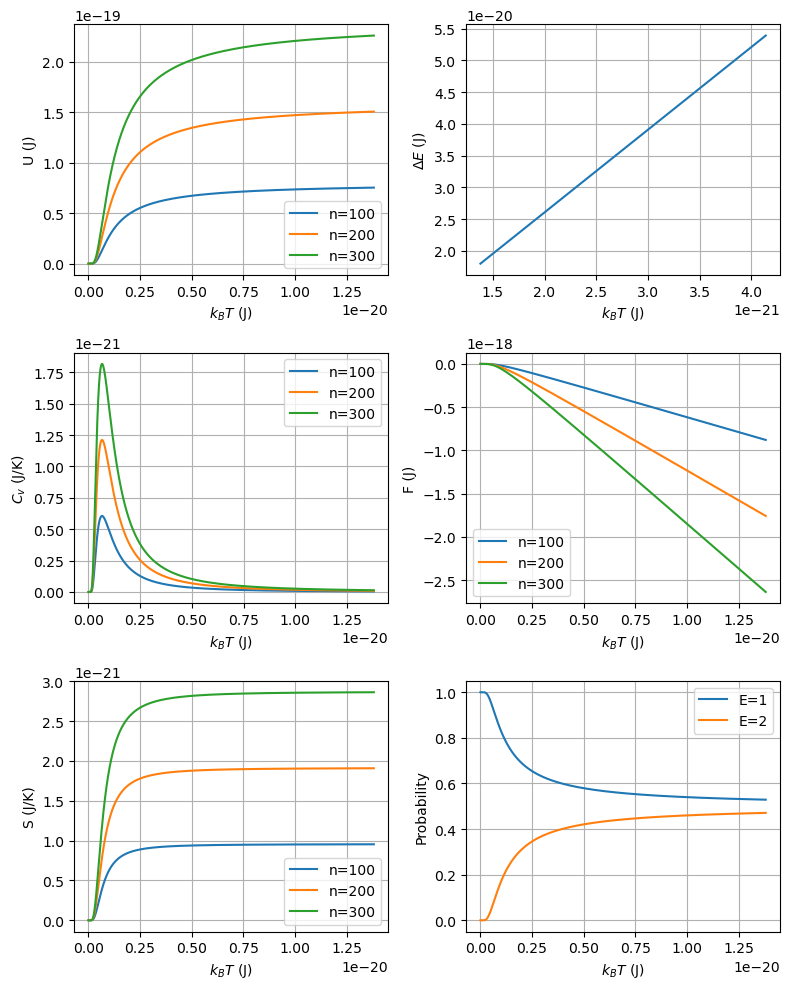

In [2]:
E = 0.01
E_level = np.arange(1,3,1)
n = np.arange(100, 301, 100)
dT = 0.1
T = np.arange(1, 1000 + dT, dT)
T1 = T[:-1]
T2 = T1[:-1]
kT = kB * T

Z_Tn = np.zeros((len(T), len(n)))
U = np.zeros((len(T1), len(n)))
E_mean = np.zeros(len(n))
E_mean_sq = np.zeros(len(n))
delta_E = np.zeros(len(n))
Cv = np.zeros((len(T2), len(n)))
F = np.zeros((len(T), len(n)))
S = np.zeros((len(T1), len(n)))

p = np.zeros((len(T), len(E_level)))

for i in range(len(n)):
    for j in range(len(T)):
        
        Z = 0
        for k in range(len(E_level)):
            p[j, k] = np.exp(-((k * E * e) / (kB * T[j])))
            Z += p[j, k]
        Z_Tn[j, i] = Z ** n[i]
        
        U[:, i] = kB * T1**2 * np.diff(np.log(Z_Tn[:, i])) / dT
        Cv[:, i] = np.diff(U[:, i]) / dT
        F[:, i] = -kB * T * np.log(Z_Tn[:, i])
        S[:, i] = -np.diff(F[:, i]) / dT
        
        p[j, :] /= Z
        
        E_mean[i] = np.mean(U[:, i])
        E_mean_sq[i] = np.mean(U[:, i] ** 2)
    delta_E[i] = np.sqrt(E_mean_sq[i] - E_mean[i] ** 2)
    
plt.figure(figsize=(8,10))

plt.subplot(3, 2, 1)
plt.plot(kT[:-1], U)
plt.grid()
plt.xlabel(r'$k_B T$ (J)')
plt.ylabel('U (J)')
plt.legend([f'n={x}' for x in n])

plt.subplot(3,2,2)
plt.plot(n*kB*T[0], delta_E)
plt.grid()
plt.xlabel(r'$k_B T$ (J)')
plt.ylabel(r'$\Delta E$ (J)')

plt.subplot(3, 2, 3)
plt.plot(kT[:-2], Cv)
plt.grid()
plt.xlabel(r'$k_B T$ (J)')
plt.ylabel(r'$C_v$ (J/K)')
plt.legend([f'n={x}' for x in n])

plt.subplot(3, 2, 4)
plt.plot(kT, F)
plt.grid()
plt.xlabel(r'$k_B T$ (J)')
plt.ylabel('F (J)')
plt.legend([f'n={x}' for x in n])

plt.subplot(3, 2, 5)
plt.plot(kT[:-1], S)
plt.grid()
plt.xlabel(r'$k_B T$ (J)')
plt.ylabel('S (J/K)')
plt.legend([f'n={x}' for x in n])

plt.subplot(3, 2, 6)
plt.plot(kT, p)
plt.grid()
plt.xlabel(r'$k_B T$ (J)')
plt.ylabel('Probability')
plt.legend([f'E={y}' for y in E_level])

plt.tight_layout()
plt.show()